Frau Prof. Dr. Back scheint im Blog sehr viel über IoT und Unternehmen zu schreiben, während sie passenderweise mehr zum Stichwort "Social" schreibt auf Twitter. Weitere Erkenntnisse sind in den beiden Grafiken herauszulesen.

In [1]:
import pandas as pd

df1 = pd.read_json (r"/content/drive/MyDrive/Uni/Studies - MBI/02_Data2Dollar/Challenge 3/ImfeldSeverin3.json")                       #Change to your own path
df1 = df1[["id", "tweet"]]                                                                                                            #Take relevant columns

df2 = pd.read_csv (r"/content/drive/MyDrive/Uni/Studies - MBI/02_Data2Dollar/Challenge 3/ImfeldSeverin3.csv", encoding="ISO-8859-1")  #Change to your own path
df2 = df2[["Title", "Content Preview"]]                                                                                               #Take relevant columns
df2.columns = ["Title", "Content"]

#df1
#df2

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [2]:
df11 = df1.tweet.str.split(expand=True).stack().value_counts().rename_axis('unique_values').reset_index(name='counts')
df21 = df2.Title.str.split(expand=True).stack().value_counts().rename_axis('unique_values').reset_index(name='counts')
df22 = df2.Content.str.split(expand=True).stack().value_counts().rename_axis('unique_values').reset_index(name='counts')

#df11
#df21
#df22

In [3]:
dfm = pd.merge(df21, df22, on='unique_values', how='outer')
dfm = pd.merge(dfm, df11, on='unique_values', how='outer')
dfm = dfm.fillna(0)
dfm["blog_total"] = dfm["counts_x"] + dfm["counts_y"]
dfm["grand_total"] = dfm["counts"] + dfm["blog_total"]
dfm.columns = ["word", "counts_title", "counts_content", "tweets_total", "blog_total", "grand_total"]
del dfm['counts_title']
del dfm['counts_content']

dfm = dfm.sort_values("grand_total",ascending=False)
dfm = dfm.reset_index()

dfm.columns = ["id","word", "tweets_total", "blog_total", "grand_total"]

lst = ["Mobile", "Business", "Unternehmen", "Learning", "IoT", "Forum", "digitalen", "Smart", "Video", "Thema", "Digital", "2020", "Zukunft", "Studie", "Lernen", "digitale", "Zeit", "Social", "Enterprise", "E-Learning", "Kolumne", "Transformation","Artikel", "Innovation", "Internet", "Lösungen", "Technologien", "Buch", "Web", "Digitalisierung", "Menschen", "Apps", "Media"] 
#indices kept changing during word count, so I decided to hardcode the most frequently used words into this notebook to ensure the resulting graphic remains the same (words of > 60 total frequency)

dfm = dfm[dfm['word'].isin(lst)]
dfm1 = dfm.sort_values("blog_total",ascending=False)
dfm2 = dfm.sort_values("tweets_total",ascending=False)

pd.set_option('display.max_rows', None)
#dfm1
#dfm2

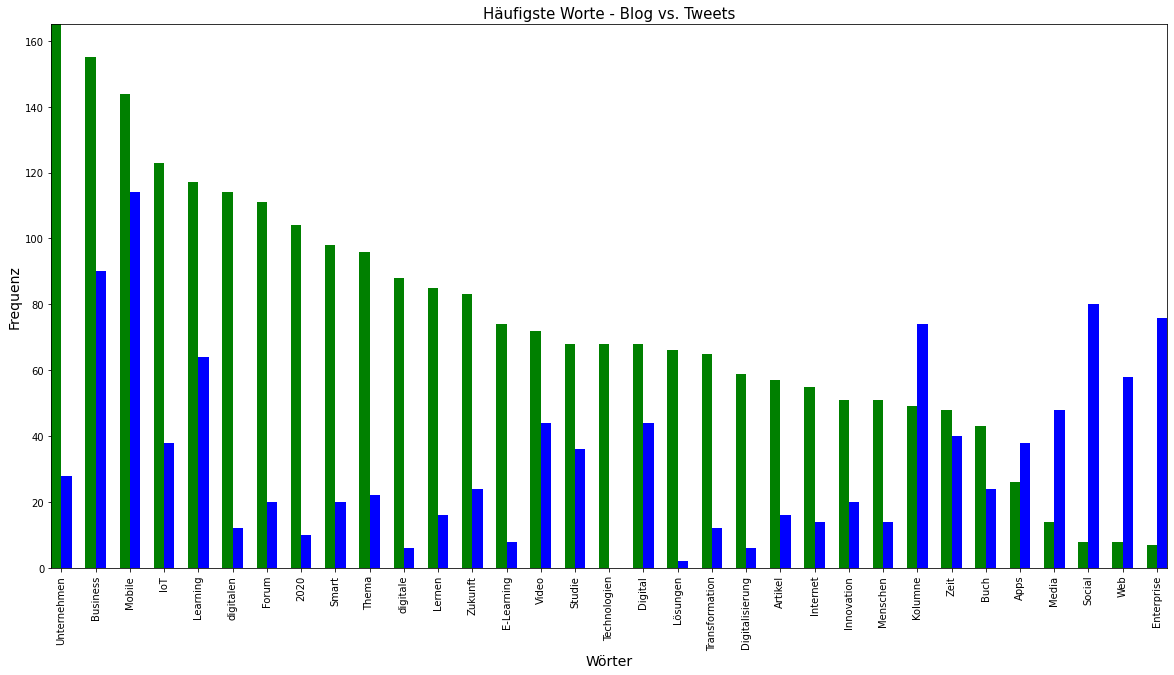

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title ('Häufigste Worte - Blog vs. Tweets', fontsize=15, color="black")
plt.xlabel("Wörter", fontsize=14)
plt.ylabel('Frequenz', fontsize=14)
plt.xticks(rotation = 90)
fig.set_size_inches(20, 10)

w = 0.3
ax.bar(dfm1["word"], dfm1["tweets_total"],width=w, color='b', align='edge')
ax.bar(dfm1["word"], dfm1["blog_total"],width=-w, color='g', align='edge')
ax.autoscale(tight=True)

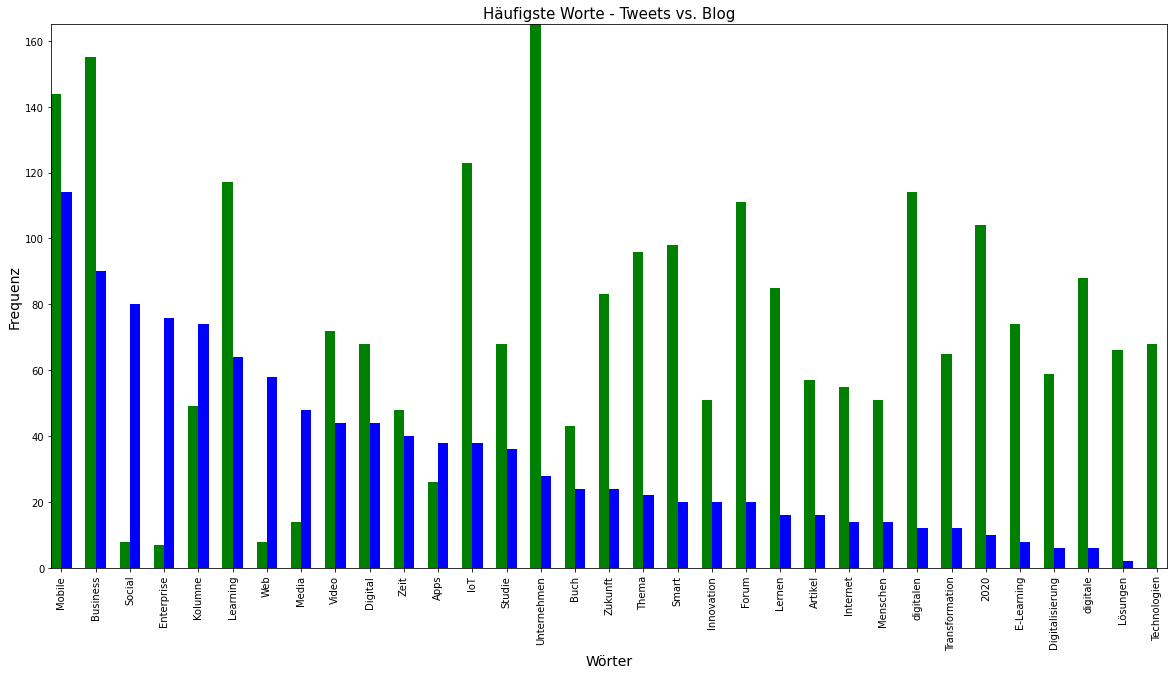

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title ('Häufigste Worte - Tweets vs. Blog', fontsize=15, color="black")
plt.xlabel("Wörter", fontsize=14)
plt.ylabel('Frequenz', fontsize=14)
plt.xticks(rotation = 90)
fig.set_size_inches(20, 10)

w = 0.3
ax.bar(dfm2["word"], dfm2["tweets_total"],width=w, color='b', align='edge')
ax.bar(dfm2["word"], dfm2["blog_total"],width=-w, color='g', align='edge')
ax.autoscale(tight=True)

# New Section